In [3]:
# import requried libaries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from skimage.feature import hog

In [4]:
# Data Directory 
working_directory = "C:/Users/omara/Downloads/Computatilonal Intelligence/"
data_directory = working_directory+"Computational Intellgience Data/"
# Initial Array for Images and labels
image_set = []
label_set = []

# Get the images and labels
for file in os.listdir(data_directory):
    path = data_directory+file+"/"
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename)) 
        # Resize image to 50 x 50 pixels
        img = cv2.resize(img, (50, 50))
        if img is not None:
            image_set.append(img)
            label_set.append(file)
#Image Data as a Numpy Array
X = np.array(image_set)

#Encode Labels
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(label_set)
print(y)

[0 0 0 ... 3 3 3]


In [5]:
#Extract HOG features
X_hog = np.array([hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=False, multichannel=True) for img in X])

C:\Users\omara\AppData\Local\Temp\ipykernel_13324\2523387673.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  X_hog = np.array([hog(img, orientations=9, pixels_per_cell=(8, 8),


In [6]:
#Normalize Image
X_hog = X_hog.astype('float32') 
X_hog = X_hog /255.0

In [7]:
#Randomize data
X_hog, y = shuffle(X_hog, y, random_state=1)

In [8]:
#Print Data Shape
print(np.array(X_hog).shape)
print(np.array(y).shape)

(2000, 900)
(2000,)


In [9]:
#Split data for training and testing data Training=80%, Testing = 20%
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.20, random_state=1)

In [10]:
#Split training data for training and validation  Training=75%, Validation = 25%
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


In [11]:
#Print the Shape
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(1200, 900)
(400, 900)
(400, 900)
(1200,)
(400,)
(400,)


In [12]:
# change the shape of y_train, y_valid, y_test to 1-D array
y_train = y_train.reshape(-1)
y_valid = y_valid.reshape(-1)
y_test = y_test.reshape(-1)

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [14]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'sigmoid']} 

In [15]:
# Initialize the SVM classifier
clf = svm.SVC()

In [16]:
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best set of parameters
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.258 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.258 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.258 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.258 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.254 total time=   0.3s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.258 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.258 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.258 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.258 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.254 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.258 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.258 total time=   0.2s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.258 total time=   0.2s
[CV 4/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.258 total time=   0.2s
[CV 5/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.254 total time=   0.3s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.258 total time=   0.3s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.258 total time=   0.3s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.258 total time=   0.3s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.258 total time=   0.3s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.254 total time=   0.3s
[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.258 total time=   0.2s
[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.258 total time=   0.2s
[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.258 total time=   0.2s
[CV 4/5] END .....C=1, gamma

[CV 4/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.258 total time=   0.2s
[CV 5/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.254 total time=   0.2s
[CV 1/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.258 total time=   0.3s
[CV 2/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.258 total time=   0.3s
[CV 3/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.258 total time=   0.5s
[CV 4/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.258 total time=   0.5s
[CV 5/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.254 total time=   0.4s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.258 total time=   0.6s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.258 total time=   0.6s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.258 total time=   0.6s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.258 total time=   0.6s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.254 total time=   0.4s
[CV 1/5] END ....C=100, gamm

In [17]:
# Assign the best set of parameters to the SVM classifier
clf = grid.best_estimator_

In [18]:
# Train the model using the training data
clf.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [19]:
# Predict on the validation set
y_pred = clf.predict(X_valid)

In [20]:
# Calculate the accuracy of the model
acc = accuracy_score(y_valid, y_pred)
print("Validation accuracy: {:.2f}%".format(acc * 100))

Validation accuracy: 61.50%


In [21]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(acc * 100))

Test accuracy: 65.00%


In [22]:
X_test_100 = X_test[:100]
y_test_100 = y_test[:100]

y_pred_100 = clf.predict(X_test_100)
print("Predicted Labels:", y_pred_100)
print("Real Labels:", y_test_100[:100])


Predicted Labels: [1 1 1 1 1 3 1 0 1 2 1 0 0 2 1 1 2 0 2 3 2 0 2 1 1 3 2 3 3 1 0 1 0 1 1 1 2
 1 2 2 2 1 1 0 2 0 1 3 1 0 0 1 0 2 2 1 1 2 3 2 1 3 1 1 3 3 2 2 0 1 0 3 3 3
 2 3 2 0 0 2 3 0 1 2 1 2 1 3 3 1 1 0 2 1 1 1 0 3 1 2]
Real Labels: [2 0 2 1 1 3 1 2 1 2 0 0 0 2 3 1 2 0 1 3 2 0 2 0 1 0 2 3 3 1 0 0 0 0 3 1 2
 1 2 2 2 1 1 0 0 0 0 3 3 0 2 1 0 2 0 1 0 2 3 2 1 2 3 2 3 2 2 0 0 1 0 3 3 2
 3 3 2 0 0 2 3 0 1 2 1 2 1 3 0 1 0 0 2 0 3 1 0 2 1 0]


D:\Academic\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


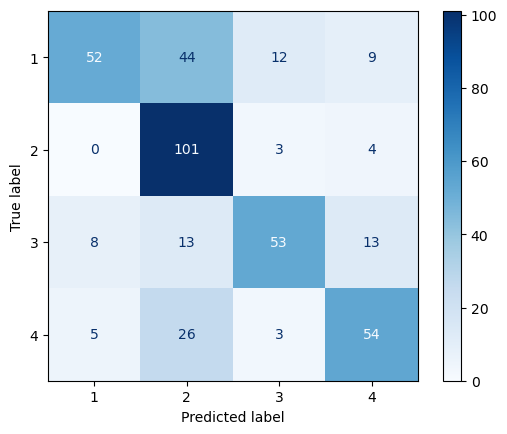

In [23]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Create a confusion matrix plot
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=y_labelencoder.classes_,
                      cmap=plt.cm.Blues)
plt.show()


D:\Academic\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


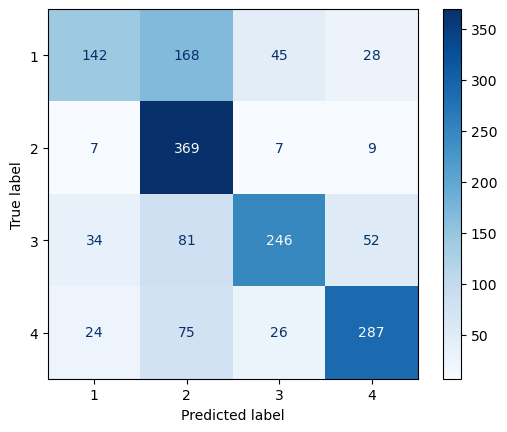

In [24]:
# Combine the training and validation sets
X_train_valid = np.concatenate((X_train, X_valid))
y_train_valid = np.concatenate((y_train, y_valid))

# Predict on the combined training and validation set
y_pred_train_valid = clf.predict(X_train_valid)

# Create a confusion matrix plot for the combined training and validation set
plot_confusion_matrix(clf, X_train_valid, y_train_valid, 
                      display_labels=y_labelencoder.classes_,
                      cmap=plt.cm.Blues)
plt.show()

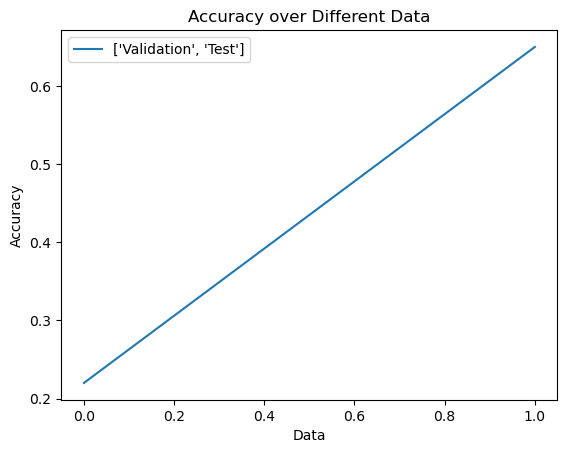

In [25]:
# Get the validation and test accuracy scores
validation_accuracy = accuracy_score(y_valid, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Plot the accuracy over the different iterations
plt.plot([validation_accuracy, test_accuracy], label=['Validation', 'Test'])
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy over Different Data')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57       117
           1       0.55      0.94      0.69       108
           2       0.75      0.61      0.67        87
           3       0.68      0.61      0.64        88

    accuracy                           0.65       400
   macro avg       0.69      0.65      0.64       400
weighted avg       0.69      0.65      0.64       400



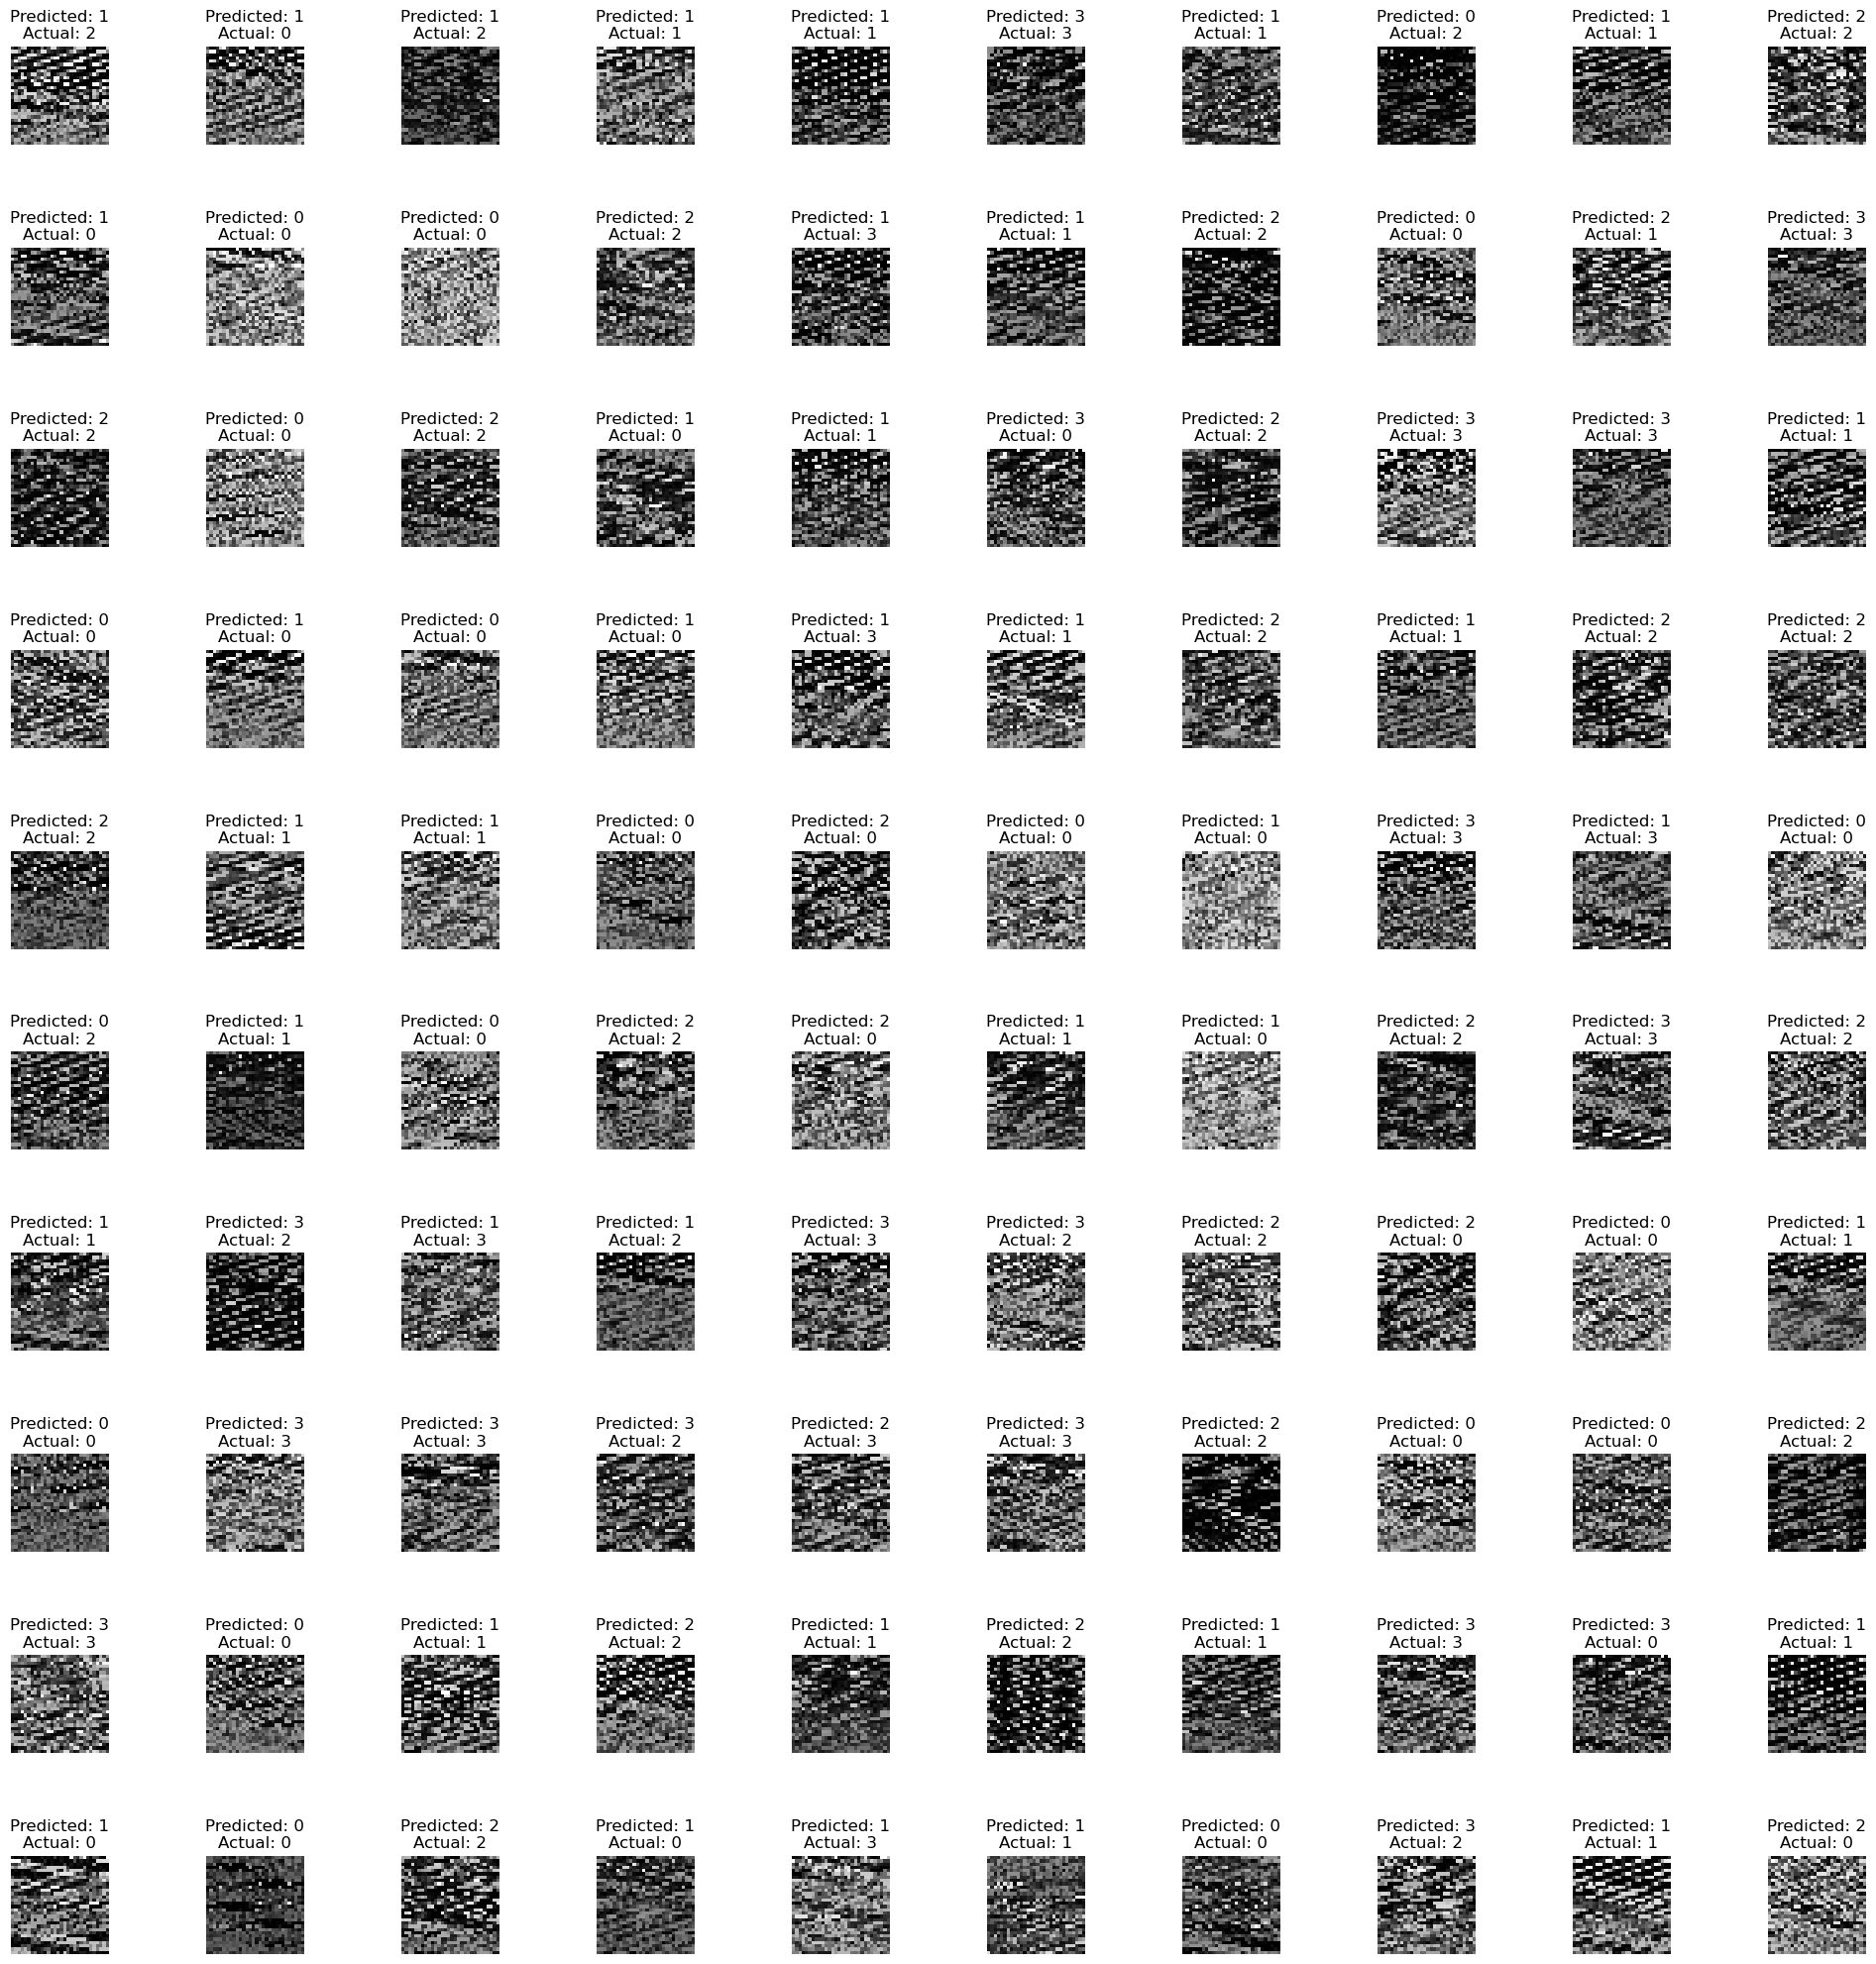

In [28]:
fig, axes = plt.subplots(10, 10, figsize=(25, 25))
axes = axes.ravel()

for i in range(100):
    axes[i].imshow(X_test_100[i].reshape(30,30), cmap='gray')
    axes[i].set_title("Predicted: " + str(y_pred_100[i]) + "\nActual: " + str(y_test_100[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=1.05)
plt.show()

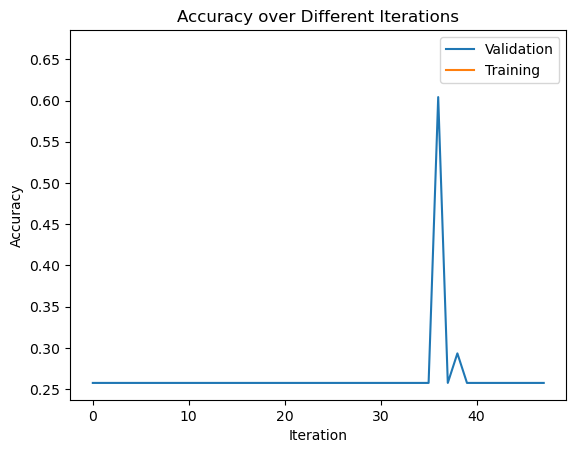

In [29]:
# Plot the accuracy over the different iterations
training_accuracy = grid.score(X_train, y_train)
validation_accuracy = grid.score(X_valid, y_valid)
# Plot the accuracy over the different iterations
plt.plot(grid.cv_results_['mean_test_score'], label='Validation')
plt.plot(training_accuracy, label='Training')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over Different Iterations')
plt.legend()
plt.show()
